# 📚 Spam Classification using Naive Bayes
A *text classification model* to detect **spam messages** using the **Naive Bayes** algorithm.

Dataset: SMS Spam Collection from Kaggle.


## 1.Library Imports & Data Loading

In [64]:
# 📦 Import necessary libraries
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
# https://drive.google.com/file/d/1N7rk-kfnDFIGMeX0ROVTjKh71gcgx-7R/view?usp=sharing

# 📥 Download the dataset
!gdown 1N7rk-kfnDFIGMeX0ROVTjKh71gcgx-7R

Downloading...
From: https://drive.google.com/uc?id=1N7rk-kfnDFIGMeX0ROVTjKh71gcgx-7R
To: e:\AIO2024\AIO2024_Projects\Module_2\Spam_Classification_Naive_Bayes\2cls_spam_text_cls.csv

  0%|          | 0.00/486k [00:00<?, ?B/s]
100%|██████████| 486k/486k [00:00<00:00, 1.71MB/s]
100%|██████████| 486k/486k [00:00<00:00, 1.71MB/s]


In [66]:
# 📂 Load the dataset
DATASET_PATH = '2cls_spam_text_cls.csv'
df = pd.read_csv(DATASET_PATH)
messages = df['Message'].values.tolist()
labels = df['Category'].values.tolist()
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [67]:
# Max and min length of messages
print("Max length of messages:", max(len(msg) for msg in messages))
print("Min length of messages:", min(len(msg) for msg in messages))

Max length of messages: 910
Min length of messages: 2


## 2. Text Preprocessing Pipeline

In [68]:
# 🧹 Text preprocessing functions
def lowercase(text):
    return text.lower()

def punctuation_removal(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    return nltk.word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = nltk.corpus.stopwords.words('english')
    return [token for token in tokens if token not in stop_words]

def stemming(tokens):
    stemmer = nltk.PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

def preprocess_text(text):
    text = lowercase(text)
    text = punctuation_removal(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stemming(tokens)
    return tokens

messages = [preprocess_text(message) for message in messages]
messages

[['go',
  'jurong',
  'point',
  'crazi',
  'avail',
  'bugi',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amor',
  'wat'],
 ['ok', 'lar', 'joke', 'wif', 'u', 'oni'],
 ['free',
  'entri',
  '2',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receiv',
  'entri',
  'questionstd',
  'txt',
  'ratetc',
  'appli',
  '08452810075over18'],
 ['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say'],
 ['nah', 'dont', 'think', 'goe', 'usf', 'live', 'around', 'though'],
 ['freemsg',
  'hey',
  'darl',
  '3',
  'week',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chg',
  'send',
  '£150',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'mell',
  'mell',
  'oru',
  'minnaminungint',
  'nurungu',
  'vettam',
  'set',
  'callertun',
  'caller',
  'press',
  '9',
  'copi',
  '

In [69]:
# 🧾 Create dictionary of unique tokens
def create_dictionary(messages):
    dictionary = []
    for tokens in messages:
        for token in tokens:
            if token not in dictionary:
                dictionary.append(token)
    return dictionary

dictionary = create_dictionary(messages)
print(f"Unique tokens in the dataset: {len(dictionary)}")

Unique tokens in the dataset: 8166


## 3. Feature Extraction & Label Encoding

In [70]:
# 🧠 Create feature vectors
def create_features(tokens, dictionary):
    features = np.zeros(len(dictionary))
    for token in tokens:
        if token in dictionary:
            features[dictionary.index(token)] += 1
    return features

X = np.array([create_features(tokens, dictionary) for tokens in messages])

In [71]:
# 🔢 Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)
print(f'Classes: {le.classes_}')
print(f'Encoded labels: {y}')

Classes: ['ham' 'spam']
Encoded labels: [0 0 1 ... 0 0 0]


## 4. Data Splitting & Model Training

In [72]:
# 🔀 Train/Validation/Test split
VAL_SIZE = 0.2
TEST_SIZE = 0.125
SEED = 0


X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=VAL_SIZE,
                                                  random_state=SEED)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size=TEST_SIZE,
                                                    random_state=SEED)

In [73]:
%%time
# 🏋️ Train Naive Bayes model
model = GaussianNB()
print('Start training ...')
model.fit(X_train, y_train)
print('Training completed!')

Start training ...
Training completed!
CPU times: total: 344 ms
Wall time: 347 ms


## 5. Model Evaluation & Prediction

In [74]:
# 📈 Evaluate model
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Validation Accuracy: 0.8816143497757848
Test Accuracy: 0.8602150537634409


In [75]:
# 🔍 Predict a new message
def predict(text, model, dictionary):
    processed_text = preprocess_text(text)
    features = create_features(processed_text, dictionary)
    features = np.array(features).reshape(1, -1)
    prediction = model.predict(features)
    return le.inverse_transform(prediction)[0]

sample_text = 'Win a free ticket to Bahamas now!'
print(f'Predicted category for "{sample_text}": {predict(sample_text, model, dictionary)}')

Predicted category for "Win a free ticket to Bahamas now!": spam


## 6. Visualization

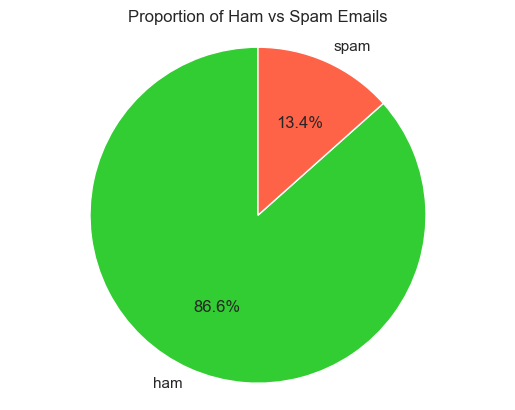

In [76]:
# 📊 Label Distribution
label_counts = df['Category'].value_counts()
color_map = {'ham': 'limegreen',
             'spam': 'tomato'}
colors = [color_map[label] for label in label_counts.index]

# Visualize label distribution by pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Ham vs Spam Emails')
plt.axis('equal')  # Chart is drawn as a circle.
plt.show()

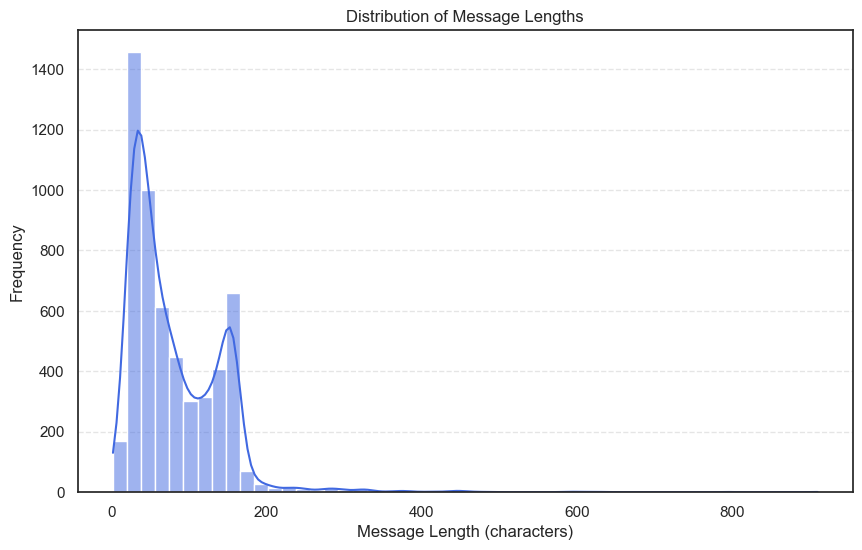

In [77]:
# 📏 Message Length Distribution
message_lengths = [len(m) for m in df["Message"]]
plt.figure(figsize=(10, 6))
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Visualize message length distribution by histogram
sns.histplot(message_lengths, bins=50, kde=True, color="royalblue")
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length (characters)")
plt.ylabel("Frequency")
plt.show()


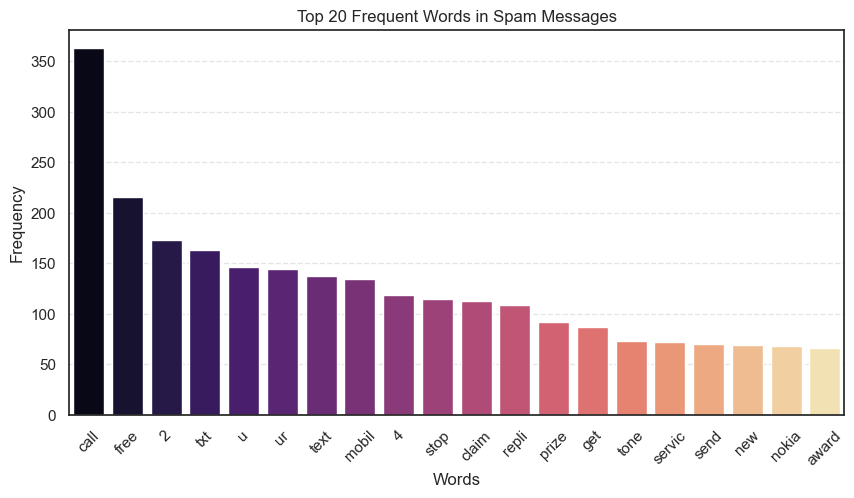

In [78]:
# 🔝 Most Frequent Words in Spam Messages
spam_tokens = [token for i, tokens in enumerate(messages) if labels[i] == "spam" for token in tokens]
spam_counter = Counter(spam_tokens)
common_spam = spam_counter.most_common(20)
words, counts = zip(*common_spam)

plt.figure(figsize=(10, 5))
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Visualize most frequent words in spam messages by bar plot
sns.barplot(x=list(words), hue=list(words), y=list(counts), palette="magma", legend=False)
plt.title("Top 20 Frequent Words in Spam Messages")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

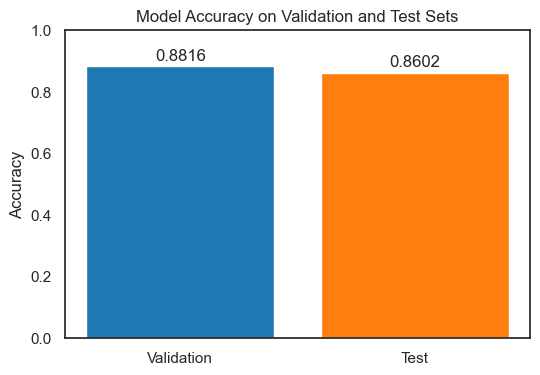

In [79]:
# 🎯 Training vs Validation Accuracy
sns.set(style="white")
plt.figure(figsize=(6, 4))

# Visualize model accuracy on validation and test sets by bar plot
plt.bar(["Validation", "Test"], [val_accuracy, test_accuracy], color=["#1f77b4", "#ff7f0e"])
plt.ylim(0, 1)
plt.title("Model Accuracy on Validation and Test Sets")
plt.ylabel("Accuracy")
for i, acc in enumerate([val_accuracy, test_accuracy]):
    plt.text(i, acc + 0.02, f"{acc:.4f}", ha='center')
plt.show()